In [1]:
import pandas as pd

In [2]:
beansData = pd.read_csv("beansData//Beans_Price_Report.csv")
beansData.head()

,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate
0,0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2800,2400,15-Feb-20
1,1,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600,2000,1800,14-Feb-20
2,2,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1800,2200,2000,13-Feb-20
3,3,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,12-Feb-20
4,4,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,11-Feb-20


In [3]:
print("From: ",pd.to_datetime(beansData["PriceDate"]).min().date())
print("To: ",pd.to_datetime(beansData["PriceDate"]).max().date())

From:  2018-01-01
To:  2020-02-15


In [4]:
beansData["weekday"] = beansData["PriceDate"].apply(lambda x: pd.to_datetime(x).date().weekday(), 1)
beansData.head()

,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2800,2400,15-Feb-20,5
1,1,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600,2000,1800,14-Feb-20,4
2,2,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1800,2200,2000,13-Feb-20,3
3,3,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,12-Feb-20,2
4,4,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,11-Feb-20,1


In [5]:
beansData.groupby(["weekday","Market"])["PriceDate"].count()

weekday  Market                     
0        Binny Mill (F&V), Bangalore     89
         Ramanagara                     106
1        Binny Mill (F&V), Bangalore     87
         Ramanagara                     106
2        Binny Mill (F&V), Bangalore     84
         Ramanagara                     106
3        Binny Mill (F&V), Bangalore     87
         Ramanagara                     106
4        Binny Mill (F&V), Bangalore     88
         Ramanagara                     107
5        Binny Mill (F&V), Bangalore     59
         Ramanagara                     104
6        Ramanagara                       2
Name: PriceDate, dtype: int64

In [85]:
from calendar import month_abbr
from math import isnan
import numpy as np
import matplotlib.pyplot as plt
import datetime


def rowFiller(x):
    indices = [x-7, x-14, x-21]
    MinPrice= sum([finalFrame.loc[i,"MinPrice"] for i in indices if i>=0])/3
    MaxPrice= sum([finalFrame.loc[i,"MaxPrice"] for i in indices if i>=0])/3
    ModalPrice= sum([finalFrame.loc[i,"ModalPrice"] for i in indices if i>=0])/3
    print(MinPrice, MaxPrice, ModalPrice)
    temp = finalFrame.loc[x-7]
    temp["PriceDate"]= dateFormatChange((pd.to_datetime(temp["PriceDate"])+datetime.timedelta(days=7)))
    temp["date"]= temp["PriceDate"]
    temp["MinPrice"]= MinPrice
    temp["MaxPrice"]= MaxPrice
    temp["ModalPrice"]= ModalPrice
    return temp


def dateFormatChange(x):
    x = str(x.date()).split("-")[::-1]
    x[1] = month_abbr[int(x[1])]
    x[2] = x[2][2:]
    return "-".join(x)



## Ramanagara

In [6]:
datelist = pd.date_range(pd.to_datetime(beansData["PriceDate"]).min().date(),end = pd.to_datetime(beansData["PriceDate"]).max().date()).to_pydatetime().tolist()
finalFrame = pd.DataFrame({"date": datelist})
print(finalFrame.head())
finalFrame["date"] = finalFrame.date.apply(dateFormatChange, 1)
finalFrame.head()

        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05


,date
0,01-Jan-18
1,02-Jan-18
2,03-Jan-18
3,04-Jan-18
4,05-Jan-18


In [7]:
finalFrame = pd.merge(finalFrame, beansData[beansData.Market=='Ramanagara'], left_on='date', right_on='PriceDate', how='left')
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.0,1600.0,1300.0,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,2000.0,1600.0,10-Jan-18,2.0


In [9]:
for i,j in finalFrame.iterrows():
    if(isnan(j.weekday)):
        finalFrame.loc[i,"weekday"] = (finalFrame.loc[i-1,"weekday"]+1)%7
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.0,1600.0,1300.0,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,2000.0,1600.0,10-Jan-18,2.0


In [10]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

          date  Sl. No. District Market Commodity Variety Grade  MinPrice  \
109  20-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
110  21-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
112  23-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
113  24-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
114  25-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   

     MaxPrice  ModalPrice PriceDate  weekday  
109       NaN         NaN       NaN      4.0  
110       NaN         NaN       NaN      5.0  
112       NaN         NaN       NaN      0.0  
113       NaN         NaN       NaN      1.0  
114       NaN         NaN       NaN      2.0  
Null rows:  Int64Index([109, 110, 112, 113, 114, 131, 290, 358, 472, 542, 543, 544, 546,
            547, 548, 549, 550, 551, 553, 554, 555, 556, 557, 558, 609, 644,
            645, 723, 740, 744, 754],
           dtype='int64') 
Number of null rows:  31

### Some Plots exploring the Data

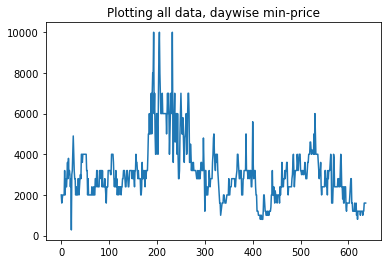

In [15]:
plt.title("Plotting all data, daywise min-price")
plt.plot(beansData[beansData.Market == "Ramanagara"].MinPrice)
plt.show()

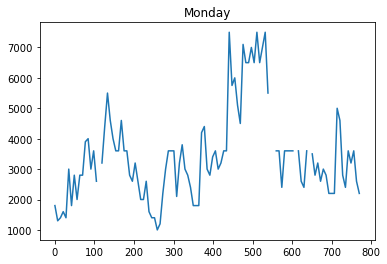

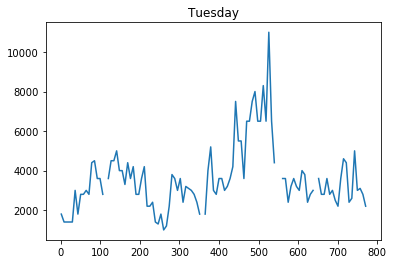

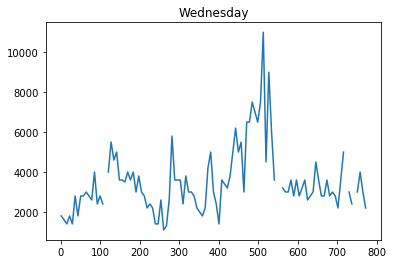

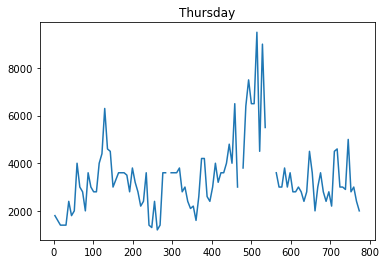

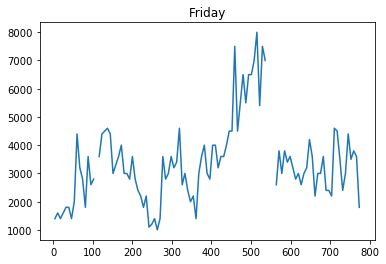

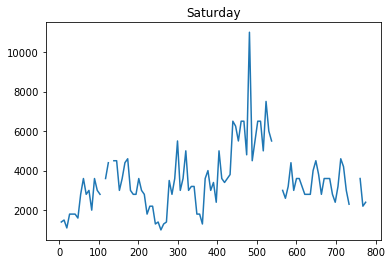

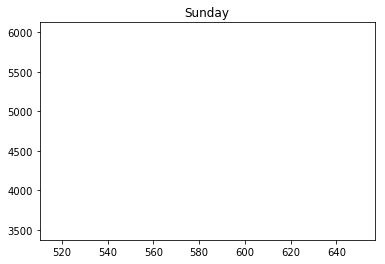

In [16]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrame[finalFrame.weekday == float(i)].ModalPrice)
    plt.show()

### Interpolation on null rows

In [68]:
print(rowFiller(101))

2533.3333333333335 3200.0 2866.6666666666665
date              12-Apr-18
Sl. No.                 555
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.67
PriceDate         12-Apr-18
weekday                   3
Name: 94, dtype: object


C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\sunri\Anaconda3\lib\site-packages\ipykerne

In [69]:
for i in nanIndices:
    print(finalFrame.loc[i])
    finalFrame.loc[i]final = rowFiller(i)
    print(finalFrame.loc[i],"\n\n")

date              27-Apr-18
Sl. No.                 548
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2666.67
MaxPrice            3333.33
ModalPrice             3000
PriceDate         20-Apr-18
weekday                   4
Name: 109, dtype: object
2666.6666666666665 3333.3333333333335 3000.0
date              20-Apr-18
Sl. No.                 548
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2666.67
MaxPrice            3333.33
ModalPrice             3000
PriceDate         20-Apr-18
weekday                   4
Name: 109, dtype: object 

C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\sunri\Anaconda3\lib\site-packages\ipykerne




date              28-Apr-18
Sl. No.                 547
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice            3466.67
ModalPrice          3133.33
PriceDate         21-Apr-18
weekday                   5
Name: 110, dtype: object
2800.0 3466.6666666666665 3133.3333333333335
date              21-Apr-18
Sl. No.                 547
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice            3466.67
ModalPrice          3133.33
PriceDate         21-Apr-18
weekday                   5
Name: 110, dtype: object 


date              30-Apr-18
Sl. No.                 546
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
Max

6666.666666666667 7933.333333333333 7300.0
date              02-Jul-19
Sl. No.                 181
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            6666.67
MaxPrice            7933.33
ModalPrice             7300
PriceDate         02-Jul-19
weekday                   1
Name: 547, dtype: object 


date              10-Jul-19
Sl. No.                 180
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               5400
MaxPrice               7000
ModalPrice             6200
PriceDate         03-Jul-19
weekday                   2
Name: 548, dtype: object
5400.0 7000.0 6200.0
date              03-Jul-19
Sl. No.                 180
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice       

2533.3333333333335 3200.0 2866.6666666666665
date              07-Oct-19
Sl. No.                 114
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.67
PriceDate         07-Oct-19
weekday                   0
Name: 644, dtype: object 


date              15-Oct-19
Sl. No.                 113
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2266.67
MaxPrice            3066.67
ModalPrice          2733.33
PriceDate         08-Oct-19
weekday                   1
Name: 645, dtype: object
2266.6666666666665 3066.6666666666665 2733.3333333333335
date              08-Oct-19
Sl. No.                 113
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade

In [70]:
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.000000,1600.000000,1300.000000,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,2000.000000,1600.000000,10-Jan-18,2.0


In [72]:
finalFrame.loc[[108,109,110,111,112]]   #all data filled except for the Sundays

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
108,19-Apr-18,543.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2400.000000,3200.000000,2800.000000,19-Apr-18,3.0
109,20-Apr-18,548.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2666.666667,3333.333333,3000.000000,20-Apr-18,4.0
110,21-Apr-18,547.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2800.000000,3466.666667,3133.333333,21-Apr-18,5.0
111,22-Apr-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
112,23-Apr-18,546.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2800.000000,3333.333333,3066.666667,23-Apr-18,0.0


In [73]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

Empty DataFrame
Columns: [date, Sl. No., District, Market, Commodity, Variety, Grade, MinPrice, MaxPrice, ModalPrice, PriceDate, weekday]
Index: []
Null rows:  Int64Index([], dtype='int64') 
Number of null rows:  0


### Replotting the weekdays-wise plots

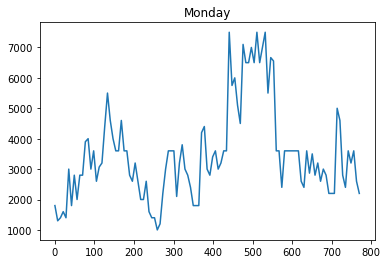

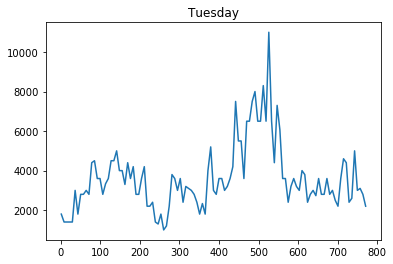

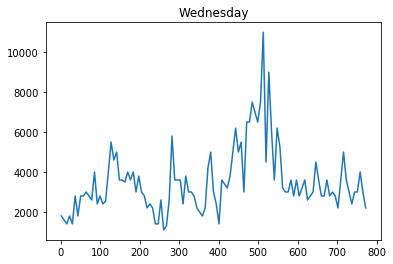

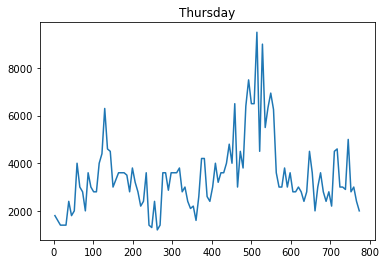

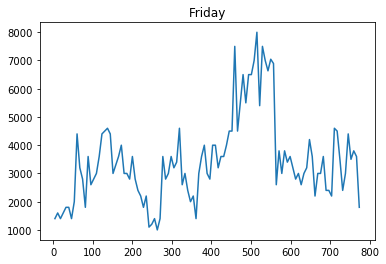

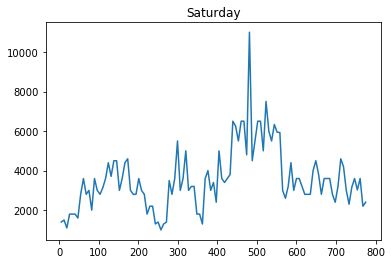

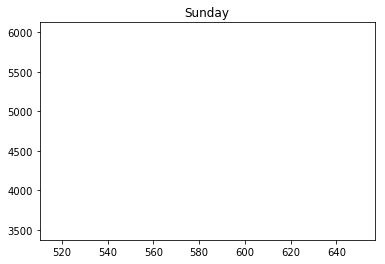

In [88]:
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrame[finalFrame.weekday == float(i)].ModalPrice)
    plt.show()

## For Binny Mill (F&V), Bangalore

In [76]:
datelist = pd.date_range(pd.to_datetime(beansData["PriceDate"]).min().date(),end = pd.to_datetime(beansData["PriceDate"]).max().date()).to_pydatetime().tolist()
finalFrameBinny = pd.DataFrame({"date": datelist})
print(finalFrameBinny.head())
finalFrameBinny["date"] = finalFrameBinny.date.apply(dateFormatChange, 1)
finalFrameBinny.head()

        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05


,date
0,01-Jan-18
1,02-Jan-18
2,03-Jan-18
3,04-Jan-18
4,05-Jan-18


In [77]:
finalFrameBinny = pd.merge(finalFrameBinny, beansData[beansData.Market=='Binny Mill (F&V), Bangalore'], left_on='date', right_on='PriceDate', how='left')
finalFrameBinny

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,493.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2200.0,01-Jan-18,0.0
1,02-Jan-18,492.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2000.0,02-Jan-18,1.0
2,03-Jan-18,491.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,490.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1400.0,1800.0,1600.0,04-Jan-18,3.0
4,05-Jan-18,489.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,488.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08-Jan-18,487.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1800.0,1500.0,08-Jan-18,0.0
8,09-Jan-18,486.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1300.0,2000.0,1600.0,09-Jan-18,1.0
9,10-Jan-18,485.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,10-Jan-18,2.0


In [78]:
for i,j in finalFrameBinny.iterrows():
    if(isnan(j.weekday)):
        finalFrameBinny.loc[i,"weekday"] = (finalFrameBinny.loc[i-1,"weekday"]+1)%7
finalFrameBinny

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,493.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2200.0,01-Jan-18,0.0
1,02-Jan-18,492.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2000.0,02-Jan-18,1.0
2,03-Jan-18,491.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,490.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1400.0,1800.0,1600.0,04-Jan-18,3.0
4,05-Jan-18,489.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,488.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,487.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1800.0,1500.0,08-Jan-18,0.0
8,09-Jan-18,486.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1300.0,2000.0,1600.0,09-Jan-18,1.0
9,10-Jan-18,485.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,10-Jan-18,2.0


In [79]:
print(finalFrameBinny[(np.isnan(finalFrameBinny.ModalPrice)) & (finalFrameBinny.weekday != 6.0) ].head())
nanIndicesBinny = finalFrameBinny[(np.isnan(finalFrameBinny.ModalPrice)) & (finalFrameBinny.weekday != 6.0) ].index
print("Null rows: ",nanIndicesBinny,"\nNumber of null rows: ",len(nanIndicesBinny))

         date  Sl. No. District Market Commodity Variety Grade  MinPrice  \
12  13-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
14  15-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
19  20-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
24  25-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
25  26-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   

    MaxPrice  ModalPrice PriceDate  weekday  
12       NaN         NaN       NaN      5.0  
14       NaN         NaN       NaN      0.0  
19       NaN         NaN       NaN      5.0  
24       NaN         NaN       NaN      3.0  
25       NaN         NaN       NaN      4.0  
Null rows:  Int64Index([ 12,  14,  19,  24,  25,  26,  40,  43,  59,  66,
            ...
            677, 683, 691, 712, 723, 726, 740, 744, 754, 768],
           dtype='int64', length=172) 
Number of null rows:  172


### Some Plots exploring the Data

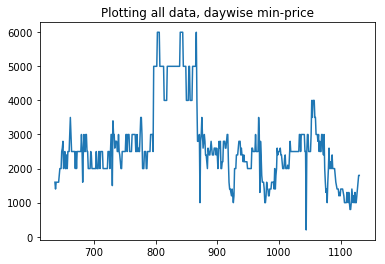

In [80]:
plt.title("Plotting all data, daywise min-price")
plt.plot(beansData[beansData.Market == 'Binny Mill (F&V), Bangalore'].MinPrice)
plt.show()

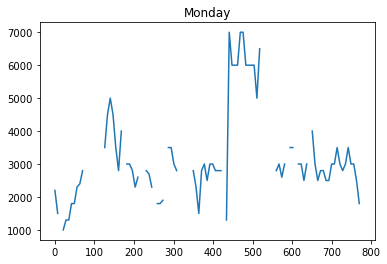

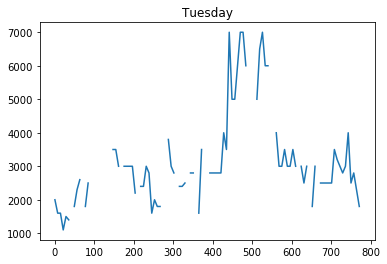

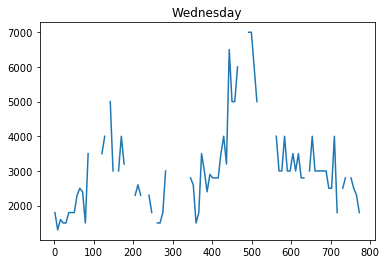

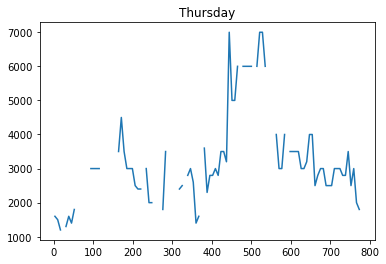

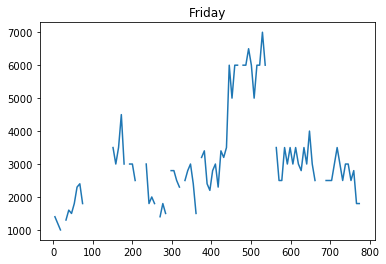

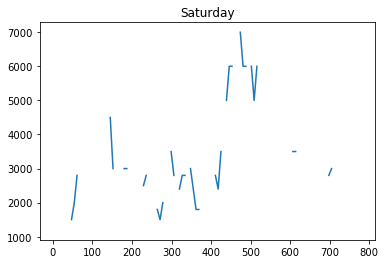

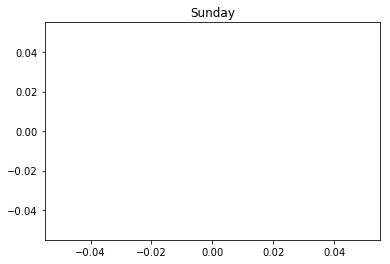

In [81]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrameBinny[finalFrameBinny.weekday == float(i)].ModalPrice)
    plt.show()

### Interpolation on null rows

In [82]:
print(rowFiller(101))

2533.3333333333335 3200.0 2866.6666666666665
date              12-Apr-18
Sl. No.                 555
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.67
PriceDate         12-Apr-18
weekday                   3
Name: 94, dtype: object


C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\sunri\Anaconda3\lib\site-packages\ipykerne

In [86]:
for i in nanIndicesBinny:
    print(finalFrameBinny.loc[i])
    finalFrameBinny.loc[i] = rowFiller(i)
    print(finalFrameBinny.loc[i],"\n\n")

date          13-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 12, dtype: object
400.0 533.3333333333334 466.6666666666667
date              13-Jan-18
Sl. No.                 631
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice                400
MaxPrice            533.333
ModalPrice          466.667
PriceDate         13-Jan-18
weekday                   5
Name: 12, dtype: object 


date          15-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday            

C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sunri\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCo

866.6666666666666 1200.0 1033.3333333333333
date              15-Jan-18
Sl. No.                 630
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            866.667
MaxPrice               1200
ModalPrice          1033.33
PriceDate         15-Jan-18
weekday                   0
Name: 14, dtype: object 


date          20-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 19, dtype: object
733.3333333333334 1200.0 966.6666666666666
date              20-Jan-18
Sl. No.                 625
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            733.333
MaxPrice      

Name: 87, dtype: object 


date          30-Mar-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 88, dtype: object
2266.6666666666665 2933.3333333333335 2600.0
date              30-Mar-18
Sl. No.                 566
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2266.67
MaxPrice            2933.33
ModalPrice             2600
PriceDate         30-Mar-18
weekday                   4
Name: 88, dtype: object 


date          31-Mar-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate    


date          21-Apr-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 110, dtype: object
2800.0 3466.6666666666665 3133.3333333333335
date              21-Apr-18
Sl. No.                 547
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice            3466.67
ModalPrice          3133.33
PriceDate         21-Apr-18
weekday                   5
Name: 110, dtype: object 


date          23-Apr-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday      

4533.333333333333 5266.666666666667 4900.0
date              17-May-18
Sl. No.                 530
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            4533.33
MaxPrice            5266.67
ModalPrice             4900
PriceDate         17-May-18
weekday                   3
Name: 136, dtype: object 


date          18-May-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 137, dtype: object
3733.3333333333335 4600.0 4166.666666666667
date              18-May-18
Sl. No.                 529
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3733.33
MaxPrice    


date          04-Jul-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               2
Name: 184, dtype: object
3266.6666666666665 4133.333333333333 3700.0
date              04-Jul-18
Sl. No.                 490
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3266.67
MaxPrice            4133.33
ModalPrice             3700
PriceDate         04-Jul-18
weekday                   2
Name: 184, dtype: object 


date          06-Jul-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday       


date          21-Sep-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 263, dtype: object
1066.6666666666667 1400.0 1233.3333333333333
date              21-Sep-18
Sl. No.                 422
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            1066.67
MaxPrice               1400
ModalPrice          1233.33
PriceDate         21-Sep-18
weekday                   4
Name: 263, dtype: object 


date          27-Sep-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday      

date          12-Nov-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               0
Name: 315, dtype: object
2800.0 3400.0 3100.0
date              12-Nov-18
Sl. No.                 379
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice               3400
ModalPrice             3100
PriceDate         12-Nov-18
weekday                   0
Name: 315, dtype: object 


date          14-Nov-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               2
Name: 317, dty

2933.3333333333335 3600.0 3266.6666666666665
date              04-Mar-19
Sl. No.                 284
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2933.33
MaxPrice               3600
ModalPrice          3266.67
PriceDate         04-Mar-19
weekday                   0
Name: 427, dtype: object 


date          09-Mar-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 432, dtype: object
3200.0 3866.6666666666665 3533.3333333333335
date              09-Mar-19
Sl. No.                 279
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice 


date          02-Jul-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               1
Name: 547, dtype: object
6666.666666666667 7933.333333333333 7300.0
date              02-Jul-19
Sl. No.                 181
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            6666.67
MaxPrice            7933.33
ModalPrice             7300
PriceDate         02-Jul-19
weekday                   1
Name: 547, dtype: object 


date          03-Jul-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday        

In [89]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

Empty DataFrame
Columns: [date, Sl. No., District, Market, Commodity, Variety, Grade, MinPrice, MaxPrice, ModalPrice, PriceDate, weekday]
Index: []
Null rows:  Int64Index([], dtype='int64') 
Number of null rows:  0


### Replotting the weekdays-wise plots

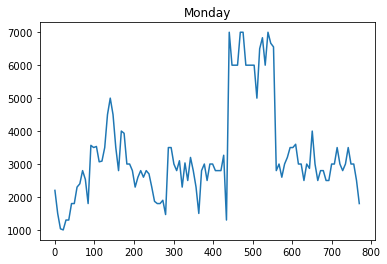

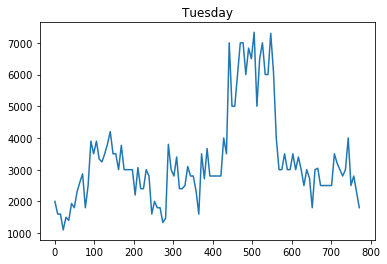

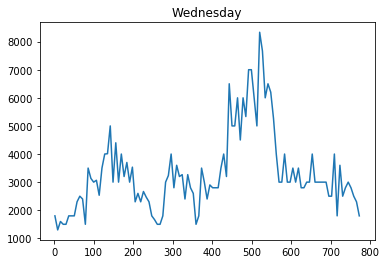

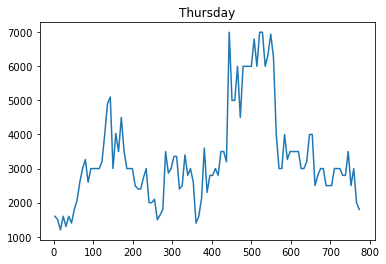

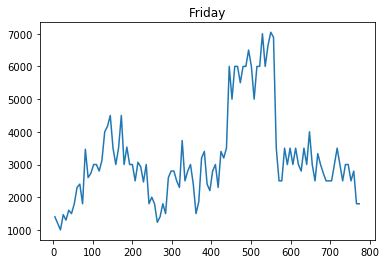

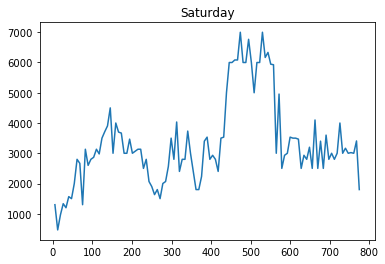

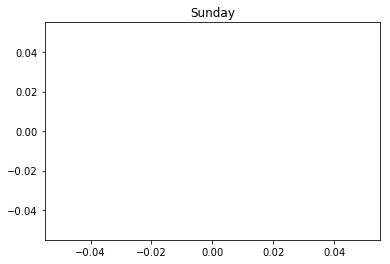

In [90]:
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrameBinny[finalFrameBinny.weekday == float(i)].ModalPrice)
    plt.show()